**Chapter 03**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

# 8 Auto Data set (Linear Regression)

In [2]:
auto_file_path = '../data/Auto'
autos = pd.read_table(auto_file_path,sep='\s+')
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# clearn the data
autos=autos.replace('?',np.NAN).dropna()
autos['horsepower']=autos['horsepower'].astype('float')

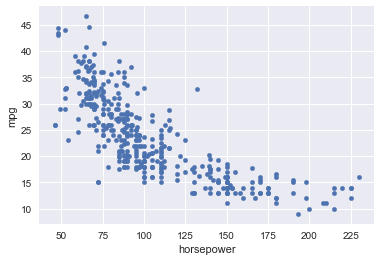

In [4]:
autos.plot.scatter(x='horsepower', y='mpg')

/Users/gaufung/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


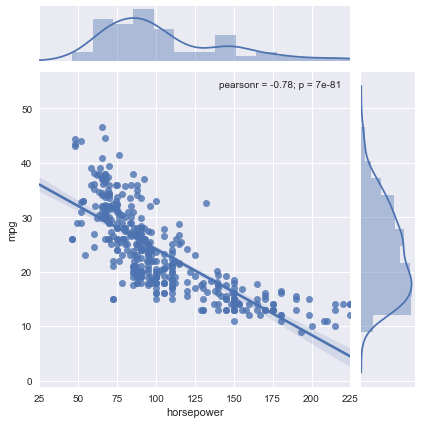

In [5]:
g = sns.jointplot('horsepower','mpg',data=autos,kind='reg', xlim=(25,225))

In [6]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
mpg_model = ols("mpg ~ horsepower", autos).fit()
mpg_model_summary=mpg_model.summary()
# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
mpg_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

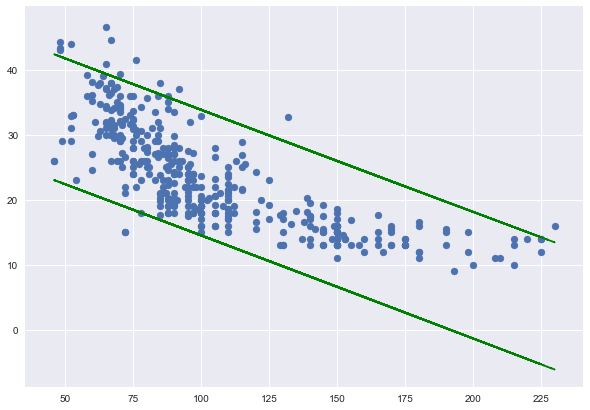

In [56]:
# confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(mpg_model)
x = autos['horsepower']
y = autos['mpg']
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, confidence_interval_lower,'g--')
ax.plot(x, confidence_interval_upper,'g--')
ax.scatter(x,y)

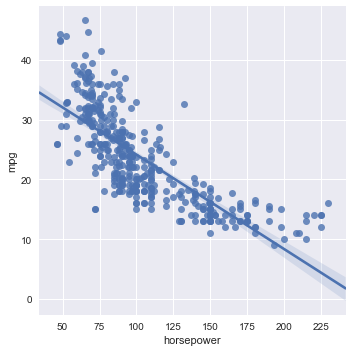

In [71]:
sns.lmplot(x='horsepower', y='mpg',data=autos)

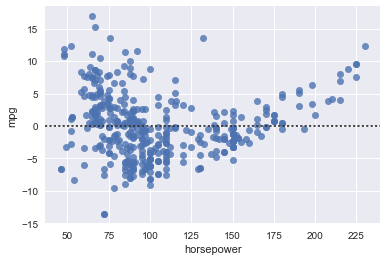

In [73]:
sns.residplot(x='horsepower', y='mpg',data=autos)

# 2 Auto Data set (Multiple Linear Regression)

/Users/gaufung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


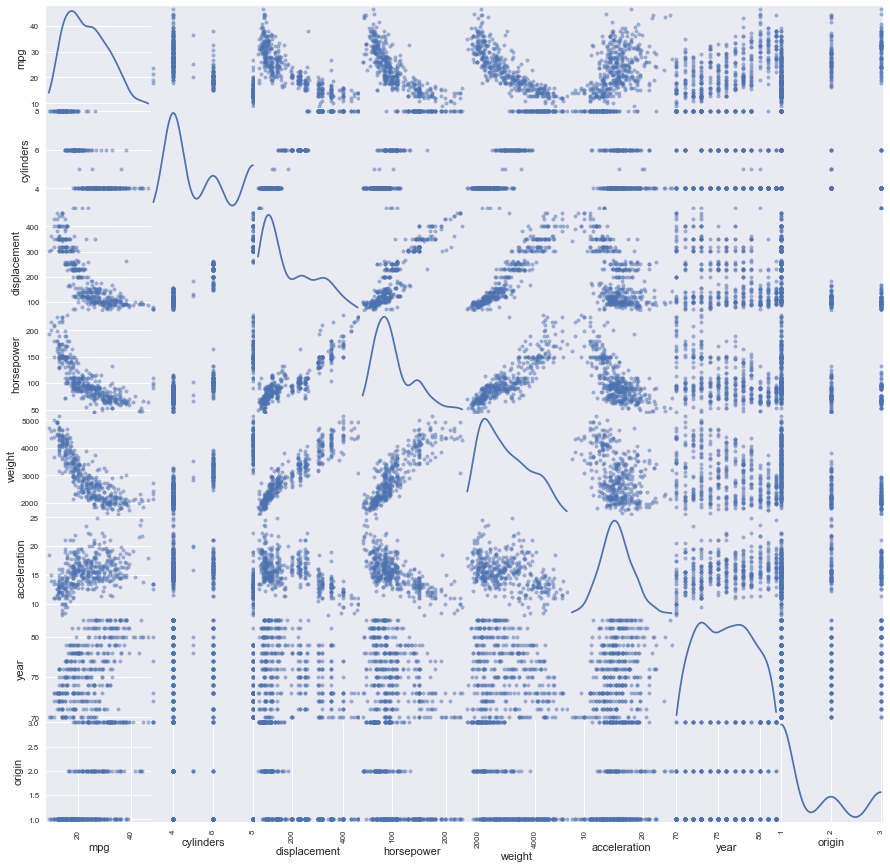

In [67]:
from pandas.tools.plotting import scatter_matrix
# mpg	cylinders	displacement	horsepower	weight	acceleration
fig, ax = plt.subplots(figsize=(15, 15))
df_auto = autos[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
scatter_matrix(df_auto, alpha=0.5,diagonal='kde', ax=ax);

In [68]:
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [70]:
mpg_multi_model = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
                      data=df_auto).fit()
mpg_multi_model_summary = mpg_multi_model.summary()
HTML(
mpg_multi_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

# 10 Carseats Data set 

In [65]:
carseats_file_name = '../data/Carseats.csv'
carseats = pd.read_csv(carseats_file_name, index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [66]:
carseats_subset = carseats[['Sales','Price','Urban','US']]
carseats_subset=carseats_subset.replace(['Yes','No'],[1,-1])
sales_multi_model = ols('Sales ~ Price + Urban + US', data=carseats_subset).fit()
sales_multi_model_summary = sales_multi_model.summary()
HTML(
sales_multi_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

$$
y_i = \beta_0+\beta_1\times price + \beta_2 \times urban + \beta_3\times us+\epsilon_i =
\begin{cases}
\beta_0+\beta_1\times price + \beta_2 + \beta_3 + \epsilon_i & i \text{th carseat is Urban is Yes and US is  Yes} \\
\beta_0+\beta_1\times price - \beta_2 + \beta_3 + \epsilon_i & i \text{th carseat is Urban is No and US is  Yes} \\
\beta_0+\beta_1\times price + \beta_2 - \beta_3 + \epsilon_i & i \text{th carseat is Urban is Yes and US is  No} \\
\beta_0+\beta_1\times price - \beta_2 - \beta_3 + \epsilon_i & i \text{th carseat is Urban is No and US is   No} \\
\end{cases}
$$

The coefficients' null hypotheis of Intercept, Price and US can be rejected.

In [69]:
sales_multi_model = ols('Sales ~ Price + US', data=carseats_subset).fit()
sales_multi_model_summary = sales_multi_model.summary()
HTML(
sales_multi_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

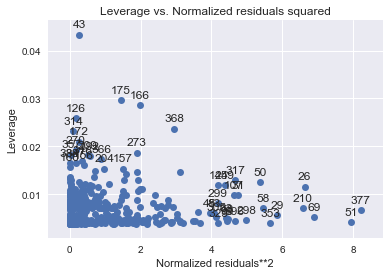

In [71]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(sales_multi_model);

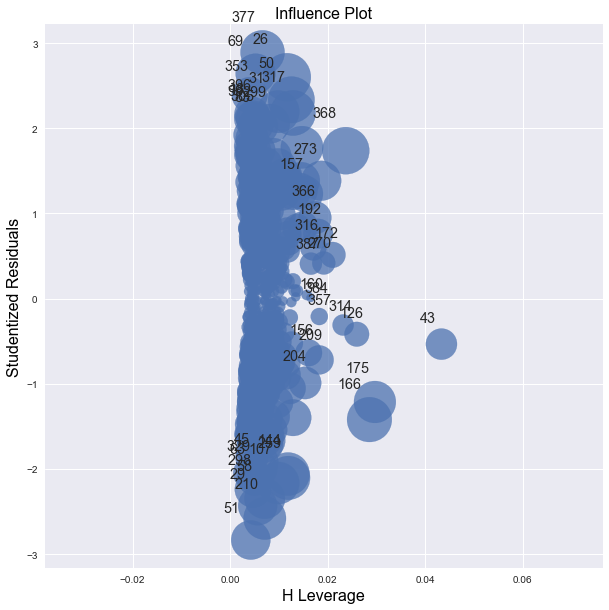

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
fig=sm.graphics.influence_plot(sales_multi_model, ax=ax, criterion="cooks")

#  11 

In [7]:
np.random.seed(1)
x = np.random.normal(0,1,100)
y = 2*x + np.random.normal(0, 1, 100)

## 11(a)

In [8]:
df = pd.DataFrame({'x':x,'y':y})
df_y_x_model = ols('y ~ x + 0', data=df).fit()
df_y_x_model_summary = df_y_x_model.summary()
HTML(
df_y_x_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

## 11(b)

In [9]:
df_x_y_model = ols('x ~ y + 0', data=df).fit()
df_x_y_model_summary = df_x_y_model.summary()
HTML(
df_x_y_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

## 11(c)

The $y=2x+\epsilon$ can be written $x=0.5(y-\epsilon)$

## 11(d)
We draw $x$ from the Gaussian normal distribution, so the $\bar{x}=0$, and the $\bar{y}=0$. $\hat{\beta}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}=\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^{n}x_i^2}$
Here is the Proof:
$$
t=\frac{\hat{\beta}}{\text{SE}(\hat{\beta})}=\frac{\sum x_iy_i}{\sum x_i^2}\sqrt{\frac{(n-1)\sum x_i^2}{\sum (y_i-x_i\hat{\beta})^2}}
$$

$$
=\frac{\sqrt{n-1}\sum x_iy_i}{\sqrt{\sum x_i^2\sum (y_i-x_i\hat{\beta})^2}} = \frac{\sqrt{n-1}\sum x_iy_i}{\sqrt{\sum x_i^2\sum (y_i^2-2\hat{\beta}x_iy_i+x_i^2\hat{\beta}^2)}}
$$

$$
=\frac{\sqrt{n-1}\sum x_iy_i}{\sqrt{\sum x_i^2 \sum y_i^2 - \sum x_i^2\hat{\beta}(2\sum x_iy_i - \hat{\beta}\sum x_i^2)}} = \frac{\sqrt{n-1}\sum x_iy_i}{\sqrt{\sum x_i^2 \sum y_i^2 - \sum x_iy_i(2\sum x_iy_i - \sum x_iy_i)}}
$$

$$
t=\frac{\sqrt{n-1}\sum x_iy_i}{\sqrt{\sum x_i^2 \sum y_i^2-(\sum x_iy_i)^2}}
$$

## 11(f)

In [10]:
df_y_x_intercept_model = ols('y ~ x', data=df).fit()
df_y_x_intercept_model_summary = df_y_x_intercept_model.summary()
HTML(
df_y_x_intercept_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

In [11]:
df_x_y_intercept_model = ols('x ~ y', data=df).fit()
df_x_y_intercept_model_summary = df_x_y_intercept_model.summary()
HTML(
df_x_y_intercept_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

# 13

## 13(a)

In [12]:
np.random.seed(1)
x = np.random.normal(0,1,100)

## 13(b)

In [13]:
eps = np.random.normal(0,0.25,100)

## 13(c)

In [14]:
y = -1.0 + 0.5*x+eps
df = pd.DataFrame({'x':x,'y':y})

## 13(d)

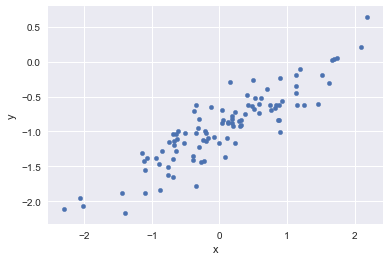

In [17]:
df.plot.scatter(x='x',y='y');

In [18]:
lm_model = ols('y ~ x', data=df).fit()
lm_model_summary = lm_model.summary()
HTML(
lm_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

## 11(e)

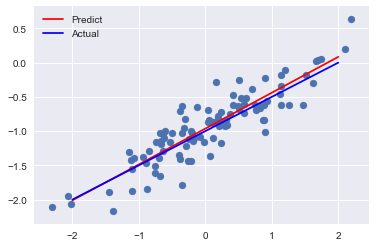

In [20]:
X = np.linspace(-2,2,100)
y_pred = X*0.5239 + (-0.9632)
y_actu = X*0.5 + (-1.0)
plt.plot(X, y_pred, 'r', label='Predict')
plt.plot(X, y_actu, 'b', label='Actual')
plt.scatter(x,y)
plt.legend()
plt.show()

## 13(g)

In [23]:
df['x2'] = x**2
lm_quadratic_model = ols('y ~ x + x2', data= df).fit()
lm_quadratic_model_summary = lm_quadratic_model.summary()
HTML(
lm_quadratic_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

As the $x^2$'s $p-$value is big enough to reject this relationship

# 14
## 14(a)

In [77]:
np.random.seed(1)
x1 = np.random.uniform(0,1,100)
x2 = 0.5*x1+ np.random.normal(100)/10
y = 2 + 2*x1 + 0.3*x2+np.random.normal(100)

$$
y=2 + 2\times x_1 + 0.3\times x_2
$$

## 14(b)

In [78]:
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df[['x1','x2']].corr()

,x1,x2
x1,1.0,1.0
x2,1.0,1.0


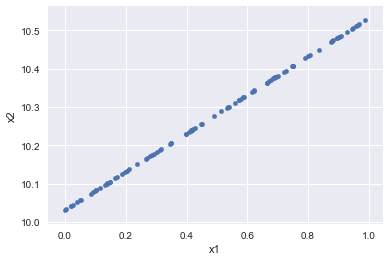

In [79]:
df[['x1','x2']].plot.scatter(x='x1',y='x2');

## 14(c)

In [80]:
lm_y_x1_x2_model = ols('y ~ x1 + x2', data=df).fit()
lm_y_x1_x2_model_summary = lm_y_x1_x2_model.summary()
HTML(
lm_y_x1_x2_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

From above tables, we get the $\hat{\beta_0}=1.577,\hat{\beta_1}=-2.9255,\hat{\beta_2}=10.15009$ which are quite various from the $\beta_0,\beta_1,\beta_2$

## 14(d)

In [81]:
lm_y_x1_model = ols('y ~ x1', data=df).fit()
lm_y_x1_model_summary = lm_y_x1_model.summary()
HTML(
lm_y_x1_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

## 14(e)

In [82]:
lm_y_x2_model = ols('y ~ x2', data=df).fit()
lm_y_x2_model_summary = lm_y_x2_model.summary()
HTML(
lm_y_x2_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

## 14(f)
Because the $x_1$ and $x_2$ have colineartiy, it is hard to distinguish their effects.

In [83]:
x1 = np.hstack((x1,[0.6]))
x2 = np.hstack([x2,[0.8]])
y = np.hstack([y, 6])
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
lm_y_x1_x2_model = ols('y ~ x1 + x2',data=df).fit()
lm_y_x1_x2_model_summary = lm_y_x1_x2_model.summary()
HTML(
lm_y_x1_x2_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

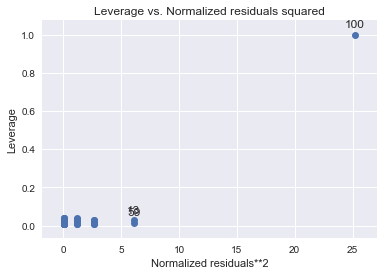

In [85]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(lm_y_x1_x2_model);

# 15

In [46]:
boston_file_name = '../data/Boston.csv'
bostons = pd.read_csv(boston_file_name, index_col=0)
bostons.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 15(a)

In [47]:
print(ols('crim ~ zn',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Fri, 05 May 2017   Prob (F-statistic):           5.51e-06
Time:                        14:59:39   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [48]:
print(ols('crim ~ indus',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.45e-21
Time:                        15:00:25   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

In [49]:
print(ols('crim ~ chas',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Fri, 05 May 2017   Prob (F-statistic):              0.209
Time:                        15:00:32   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

In [50]:
print(ols('crim ~ nox',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.75e-23
Time:                        15:00:52   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

In [51]:
print(ols('crim ~ rm',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 05 May 2017   Prob (F-statistic):           6.35e-07
Time:                        15:01:01   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

In [52]:
print(ols('crim ~ age',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.85e-16
Time:                        15:01:30   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

In [53]:
print(ols('crim ~ dis',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Fri, 05 May 2017   Prob (F-statistic):           8.52e-19
Time:                        15:01:38   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

In [54]:
print(ols('crim ~ rad',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.69e-56
Time:                        15:01:46   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

In [55]:
print(ols('crim ~ tax',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.36e-47
Time:                        15:01:54   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [56]:
print(ols('crim ~ ptratio',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.94e-11
Time:                        15:02:06   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

In [57]:
print(ols('crim ~ black',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.49e-19
Time:                        15:02:15   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.5535      1.426     11.609      0.0

In [58]:
print(ols('crim ~ lstat',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.65e-27
Time:                        15:02:26   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

In [59]:
print(ols('crim ~ medv',data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.17e-19
Time:                        15:02:37   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

## 15(b)

In [63]:
print(ols('crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv',
          data=bostons).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.57e-56
Time:                        15:04:26   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0